# Data Science Capstone Project:

Below is my capstone project for the General Assembly Data Course. The dataset I utilized I found via Kaggle on the American Statistical Association (http://stat-computing.org/dataexpo/2009/the-data.html). 

The dataset that I utilized included airline delay data from 2008. The variables include:

* | Name |	Description
---------|----|-----------
1	| Year	| 1987-2008
2	| Month |	1-12
3	| DayofMonth |	1-31
4	| DayOfWeek |	1 (Monday) - 7 (Sunday)
5	| DepTime |	actual departure time (local, hhmm)
6	| CRSDepTime |	scheduled departure time (local, hhmm)
7	| ArrTime |	actual arrival time (local, hhmm)
8	| CRSArrTime |	scheduled arrival time (local, hhmm)
9	| UniqueCarrier |	unique carrier code
10	| FlightNum |	flight number
11	| TailNum |	plane tail number
12	| ActualElapsedTime |	in minutes
13	| CRSElapsedTime |	in minutes
14	| AirTime |	in minutes
15	| ArrDelay |	arrival delay, in minutes
16	| DepDelay |	departure delay, in minutes
17	| Origin |	origin IATA airport code
18	| Dest |	destination IATA airport code
19	| Distance |	in miles
20	| TaxiIn |	taxi in time, in minutes
21	| TaxiOut |	taxi out time in minutes
22	| Cancelled |	was the flight cancelled?
23	| CancellationCode |	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24	| Diverted |	1 = yes, 0 = no
25	| CarrierDelay |	in minutes
26	| WeatherDelay |	in minutes
27	| NASDelay |	in minutes
28	| SecurityDelay |	in minutes
29	| LateAircraftDelay |	in minutes

In [3]:
!pwd

/Users/etown/Desktop/eperry


### Data Dictionary for the data I utilized:



FieldName|Type|Description
---------|----|-----------
Year | Integer | Years for this project include 2004, 2005, 2006, 2007, 2008
Month | Integer | January, February, March, April, May, June, July, August, September, October, November, December
DayofWeek | Integer | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
Deptime | Float | Actual departure of the airplane
CRSDepTime | Integer | Scheduled departure time (CRS is the computer system)
ArrTime | Float | Arrival Time 
CSRArrTime | Float | Scheduled arrival time
FlightNumber | Integer | Flight Number
TailNumber | Integer | Tail Number of the Plane
ActualElapsedtime | Integer | Elapsed Time of Flight, in Minutes



### Step One:

Import the python libraries that I will be utilizing throughout this project.

Pandas: utilized for the data discovering starting with reading in the data through understanding data types, values, counts, and more.

The other libraries I used include Numpy, MatPlotLib, StatsModels, SKLearn, and Seaborn.

Following the import of the libraries, I can begin my data exploration and predicting.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

import sklearn.linear_model as lm
import seaborn as sns

In [6]:
# Reading in the CSV file using the Pandas library and creating a dataframe.

airlineData08 = pd.read_csv('airlineData/DelayedFlights.csv') 

In [39]:
# Getting an idea of how much data I have (rows by columns). Also known as a tuple (one of Bilind's favorite terms.)

airlineData08.shape

(1936758, 30)

In [40]:
# Getting a read-out of the column names in my data set.

airlineData08.columns

Index([u'Unnamed: 0', u'Year', u'Month', u'DayofMonth', u'DayOfWeek',
       u'DepTime', u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')

In [41]:
# Getting a count for each of the columns to determine if there are any null values.

airlineData08.count()

Unnamed: 0           1936758
Year                 1936758
Month                1936758
DayofMonth           1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
ArrTime              1929648
CRSArrTime           1936758
UniqueCarrier        1936758
FlightNum            1936758
TailNum              1936753
ActualElapsedTime    1928371
CRSElapsedTime       1936560
AirTime              1928371
ArrDelay             1928371
DepDelay             1936758
Origin               1936758
Dest                 1936758
Distance             1936758
TaxiIn               1929648
TaxiOut              1936303
Cancelled            1936758
CancellationCode     1936758
Diverted             1936758
CarrierDelay         1247488
WeatherDelay         1247488
NASDelay             1247488
SecurityDelay        1247488
LateAircraftDelay    1247488
dtype: int64

In [42]:
# First five rows of my data including the header.

airlineData08.head() 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [43]:
# Using the describe function to generate summary statistics, excluding NaN (or null) values.

airlineData08.describe() 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [44]:
# This provides an overview of data types as well as memory usage.

airlineData08.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(11), object(5)
me

#### In the section below, I am conducting data discovery on the Depature Delay (in minutes) to understand a bit more about it in my dataset.

In [45]:
airlineData08.groupby("DepDelay").describe() 

ActualElapsedTime       AirTime      ArrDelay       ArrTime  \
DepDelay                                                                      
6.0      count       91377.000000  91377.000000  91377.000000  91415.000000   
         mean          135.947886    113.061460      3.945293   1556.512575   
         std            75.167345     72.355489     13.702116    468.614911   
         min            18.000000      1.000000    -59.000000      1.000000   
         25%            79.000000     59.000000     -4.000000   1225.000000   
         50%           117.000000     93.000000      2.000000   1605.000000   
         75%           170.000000    145.000000      9.000000   1929.000000   
         max           672.000000    654.000000    293.000000   2400.000000   
7.0      count       83392.000000  83392.000000  83392.000000  83435.000000   
         mean          135.153540    112.151357      5.056432   1561.094025   
         std            74.872107     71.980566     14.064612    469.853500   
         min            19.000000      3.000000    -68.000000      1.000000   
         25%            79.000000     59.000000     -3.000000   1230.000000   
         50%           117.000000     93.000000      3.000000   1609.000000   
         75%           168.000000    143.000000     10.000000   1931.000000   
         max           657.000000    628.000000    310.000000   2400.000000   
8.0      count       75992.000000  75992.000000  75992.000000  76051.000000   
         mean          134.523516    111.489867      5.999934   1568.467200   
         std            74.427304     71.669480     13.924008    469.726870   
         min            18.000000      5.000000    -70.000000      1.000000   
         25%            79.000000     59.000000     -2.000000   1238.000000   
         50%           116.000000     92.000000      4.000000   1615.000000   
         75%           167.000000    142.000000     11.000000   1934.000000   
         max           669.000000    642.000000    252.000000   2400.000000   
9.0      count       70021.000000  70021.000000  70021.000000  70057.000000   
         mean          134.851202    111.643907      7.176390   1580.775312   
         std            74.181481     71.151649     14.416971    468.542467   
         min            21.000000      9.000000    -60.000000      1.000000   
         25%            80.000000     59.000000     -1.000000   1245.000000   
         50%           116.000000     92.000000      5.000000   1624.000000   
...                           ...           ...           ...           ...   
1710.0   std                  NaN           NaN           NaN           NaN   
         min            72.000000     50.000000   1707.000000   2252.000000   
         25%            72.000000     50.000000   1707.000000   2252.000000   
         50%            72.000000     50.000000   1707.000000   2252.000000   
         75%            72.000000     50.000000   1707.000000   2252.000000   
         max            72.000000     50.000000   1707.000000   2252.000000   
1952.0   count           1.000000      1.000000      1.000000      1.000000   
         mean          172.000000    145.000000   1951.000000    254.000000   
         std                  NaN           NaN           NaN           NaN   
         min           172.000000    145.000000   1951.000000    254.000000   
         25%           172.000000    145.000000   1951.000000    254.000000   
         50%           172.000000    145.000000   1951.000000    254.000000   
         75%           172.000000    145.000000   1951.000000    254.000000   
         max           172.000000    145.000000   1951.000000    254.000000   
2457.0   count           1.000000      1.000000      1.000000      1.000000   
         mean          459.000000    437.000000   2461.000000   2256.000000   
         std                  NaN           NaN           NaN           NaN   
         min           459.000000    437.000000   2461.000000   22

# Section Overview:

Below, I'm using removing the the columns from the CSV file that I don't need for this project.

In [7]:
ColstoKeep = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 
                             'CRSArrTime', 'UniqueCarrier', 'ArrDelay', 'DepDelay', 'Cancelled', 'Distance']
dfAirline = airlineData08[ColstoKeep]
dfAirline.head() 

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Cancelled,Distance
0,1,3,4,2003.0,1955,2211.0,2225,WN,-14.0,8.0,0,810
1,1,3,4,754.0,735,1002.0,1000,WN,2.0,19.0,0,810
2,1,3,4,628.0,620,804.0,750,WN,14.0,8.0,0,515
3,1,3,4,1829.0,1755,1959.0,1925,WN,34.0,34.0,0,515
4,1,3,4,1940.0,1915,2121.0,2110,WN,11.0,25.0,0,688


In [8]:
dfAirline.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,Cancelled,Distance
Month,1.000000,0.059651,0.000088,-0.007809,-0.011367,0.001014,0.001367,-0.000897,0.004769,0.028837,0.005498
DayofMonth,0.059651,1.000000,0.017476,0.001014,0.001019,0.000833,0.000758,0.004129,0.005289,0.004671,0.000117
DayOfWeek,0.000088,0.017476,1.000000,0.021924,0.027039,0.010913,0.017750,0.006123,0.008538,0.000023,0.008138
DepTime,-0.007809,0.001014,0.021924,1.000000,0.881598,0.458934,0.711513,0.127017,0.139254,0.002280,-0.056003
CRSDepTime,-0.011367,0.001019,0.027039,0.881598,1.000000,0.396724,0.710303,0.044447,0.058875,0.000023,-0.029517
ArrTime,0.001014,0.000833,0.010913,0.458934,0.396724,1.000000,0.619385,-0.050948,-0.053024,NaN,-0.027751
CRSArrTime,0.001367,0.000758,0.017750,0.711513,0.710303,0.619385,1.000000,0.043078,0.053706,0.000201,0.024335
ArrDelay,-0.000897,0.004129,0.006123,0.127017,0.044447,-0.050948,0.043078,1.000000,0.952927,NaN,-0.029853
DepDelay,0.004769,0.005289,0.008538,0.139254,0.058875,-0.053024,0.053706,0.952927,1.000000,0.016542,-0.007718
Cancelled,0.028837,0.004671,0.000023,0.002280,0.000023,NaN,0.000201,NaN,0.016542,1.000000,-0.005060


In [9]:
dfAirline.cov()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,Cancelled,Distance
Month,12.128129,1.823158,6.133808e-04,-12.250832,-16.815350,1.935756,2.212481,-0.177237,0.886921,1.815235e-03,10.999921
DayofMonth,1.823158,77.022951,3.061218e-01,4.010250,3.799446,4.007974,3.091041,2.057657,2.478843,7.409568e-04,0.590079
DayOfWeek,0.000613,0.306122,3.983881e+00,19.713448,22.923957,11.940724,16.461024,0.694017,0.910042,8.283790e-07,9.331518
DepTime,-12.250832,4.010250,1.971345e+01,202936.964786,168694.723281,113322.577298,148927.503939,3248.830853,3350.032020,1.856862e-02,-14493.381470
CRSDepTime,-16.815350,3.799446,2.292396e+01,168694.723281,180426.834023,92371.525562,140186.340329,1071.980053,1335.507704,1.770054e-04,-7202.723615
ArrTime,1.935756,4.007974,1.194072e+01,113322.577298,92371.525562,300499.275955,157758.323404,-1585.396302,-1548.457723,0.000000e+00,-8733.832433
CRSArrTime,2.212481,3.091041,1.646102e+01,148927.503939,140186.340329,157758.323404,215885.415587,1136.563460,1332.581521,1.684673e-03,6495.620804
ArrDelay,-0.177237,2.057657,6.940174e-01,3248.830853,1071.980053,-1585.396302,1136.563460,3224.503873,2882.312309,0.000000e+00,-972.834612
DepDelay,0.886921,2.478843,9.100417e-01,3350.032020,1335.507704,-1548.457723,1332.581521,2882.312309,2851.827257,1.596782e-02,-236.778737
Cancelled,0.001815,0.000741,8.283790e-07,0.018569,0.000177,0.000000,0.001685,0.000000,0.015968,3.267282e-04,-0.052540


### Below, I'm learning more about the DayOfWeek column in my dataframe.

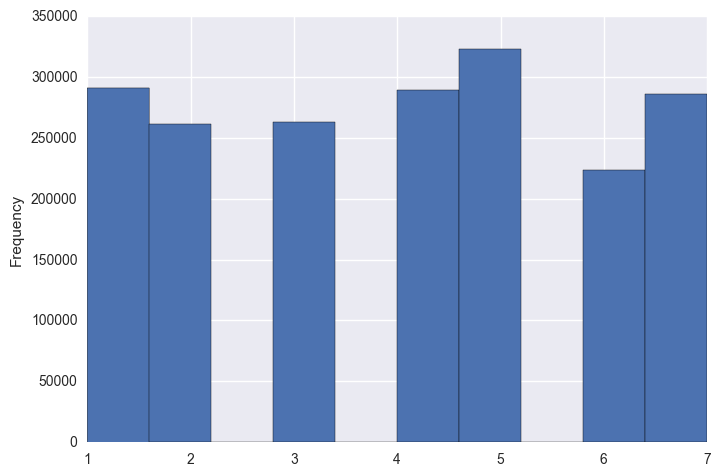

In [47]:
# Plotting to determine the variance of how much data I have for each day of the week.

dfAirline.DayOfWeek.plot(kind = "hist") 
plt.show() 

In [49]:
dfAirline.DayOfWeek.skew() 

-0.0012998556667756891

In [61]:
dfAirline.DayOfWeek.kurt() 

-1.2087187012497396

In [63]:
dfAirline.DayOfWeek.describe() 

count    1.936758e+06
mean     3.984827e+00
std      1.995966e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: DayOfWeek, dtype: float64

In [71]:
dfAirline.Distance.describe() 

count    1.936758e+06
mean     7.656862e+02
std      5.744797e+02
min      1.100000e+01
25%      3.380000e+02
50%      6.060000e+02
75%      9.980000e+02
max      4.962000e+03
Name: Distance, dtype: float64

In [17]:
# Obtaining summary statistics just for the 'DepDelay' column. 
# The DepDelay column represents how long the aircraft was delayed in minutes.

dfAirline.DepDelay.describe() 

count    1.936758e+06
mean     4.318518e+01
std      5.340250e+01
min      6.000000e+00
25%      1.200000e+01
50%      2.400000e+01
75%      5.300000e+01
max      2.467000e+03
Name: DepDelay, dtype: float64

In [64]:
dfAirline.DepDelay.skew() 

4.495077544871771

In [65]:
dfAirline.DepDelay.kurt()

48.846523903741669

###### Based upon the above information, the average airline delay based upon the 2008 data is 4.32 minutes. 

## Predicting Airline Delays

Due to the size of my original dataset, I utilized a slice of that which included only the columns that I needed for my below predictions. 

In [4]:
# Reading in the new CSV using Pandas. 

dfDelayData = pd.read_csv('airlineData/flightDelays2.csv') 

In [5]:
# Obtaining the column names; confirming that I have the columns I need.

dfDelayData.columns

Index([u'DayOfMonth', u'DayOfWeek', u'FlightDate', u'UniqueCarrier',
       u'Airline', u'Carrier', u'Origin', u'Dest', u'CRSDepTime', u'DepTime',
       u'DepDelay'],
      dtype='object')

In [6]:
# Getting the shape (rows by columns) also known as a tuple.

dfDelayData.shape

(469968, 11)

In [7]:
# Getting the first five rows of data.

dfDelayData.head() 

,DayOfMonth,DayOfWeek,FlightDate,UniqueCarrier,Airline,Carrier,Origin,Dest,CRSDepTime,DepTime,DepDelay
0,1,4,1/1/2015,AA,19805,AA,12478,12892,900,855.0,0.0
1,1,4,1/1/2015,AA,19805,AA,12892,12478,900,856.0,0.0
2,1,4,1/1/2015,AA,19805,AA,12478,12892,1230,1226.0,0.0
3,1,4,1/1/2015,AA,19805,AA,12892,12478,1220,1214.0,0.0
4,1,4,1/1/2015,AA,19805,AA,11298,12173,1305,1754.0,1.0


In [8]:
# Running a count of the 'DepDelay' column to determine if there are any null values that need to be dropped.

dfDelayData.DepDelay.count() 

458311

In [9]:
# Dropping null values from the DepDelay (or Department Delay) column.

dfDelayData = dfDelayData.loc[dfDelayData.DepDelay.notnull()].copy() 

In [10]:
# Getting the shape to understand what data I am working with prior to adding dummy variables.
# Based on the below, I can see that no rows were dropped as the count is the same as two lines above.

dfDelayData.shape

(458311, 11)

In the section below, I am predicting the probability of delay based upon the time of the day.

In [11]:
# First remove the null values from the dataframe.
# Then create dummy variables for UniqueCarrier and DayOfWeek - predictors that I will be using.
# Then you first the model.

dfDelayData = dfDelayData[dfDelayData.DepDelay.notnull()]
dfDelayData = dfDelayData.join(pd.get_dummies(dfDelayData['UniqueCarrier'], prefix='carrier'))
dfDelayData = dfDelayData.join(pd.get_dummies(dfDelayData['DayOfWeek'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in dfDelayData.columns if 'dow_' in i] 

In [12]:
# Checking to confirm the dummy variables were added

dfDelayData.shape

(458311, 32)

In [13]:
features += ['CRSDepTime']
model.fit(dfDelayData[features[1:]], dfDelayData['DepDelay'])

dfDelayData['probability'] = model.predict_proba(dfDelayData[features[1:]]).T[1]

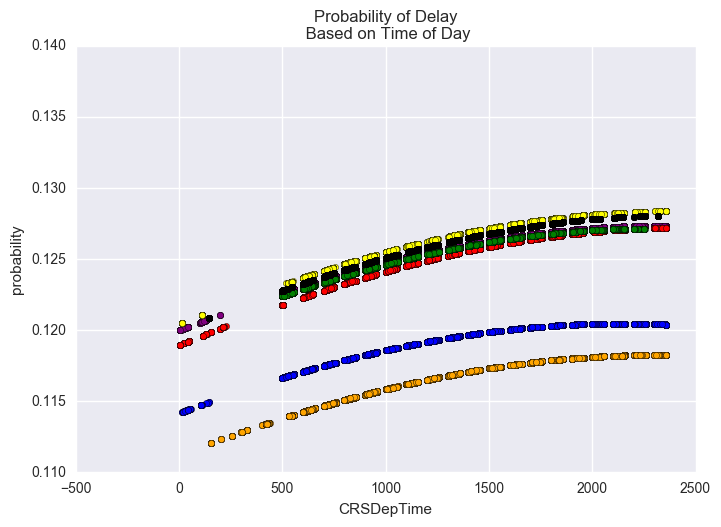

In [33]:
ax = plt.subplot(111)
colors = ['purple', 'red', 'orange', 'blue', 'green', 'yellow', 'black']
for e, c in enumerate(colors):
    dfDelayData[dfDelayData[features[e]] == 1].plot(x='CRSDepTime', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Time of Day')

#### Based upon the graph above, Saturday flights (yellow) are the most likely to be delayed. Friday (green) which has the highest volume of flights ranks third in terms of the number of delayed flights.

#### The probability of your flight being delayed increases as the day progresses. 

***

In [15]:
# Learning more about the Carrier column of my dataframe.

dfDelayData.groupby("Carrier").describe() 

Airline    CRSDepTime    DayOfMonth     DayOfWeek  \
Carrier                                                            
AA      count  43173.0  43173.000000  43173.000000  43173.000000   
        mean   19805.0   1322.204387     15.793714      4.097978   
        std        0.0    476.831738      8.935966      1.939495   
        min    19805.0      5.000000      1.000000      1.000000   
        25%    19805.0    915.000000      8.000000      2.000000   
        50%    19805.0   1315.000000     16.000000      4.000000   
        75%    19805.0   1720.000000     23.000000      6.000000   
        max    19805.0   2355.000000     31.000000      7.000000   
AS      count  13198.0  13198.000000  13198.000000  13198.000000   
        mean   19930.0   1324.201167     15.816033      4.120170   
        std        0.0    506.447874      8.994418      1.935017   
        min    19930.0      5.000000      1.000000      1.000000   
        25%    19930.0    905.000000      8.000000      2.000000   
        50%    19930.0   1320.000000     16.000000      4.000000   
        75%    19930.0   1745.000000     24.000000      6.000000   
        max    19930.0   2355.000000     31.000000      7.000000   
B6      count  20531.0  20531.000000  20531.000000  20531.000000   
        mean   20409.0   1357.818811     15.236520      4.174809   
        std        0.0    509.670404      8.885787      1.924787   
        min    20409.0    155.000000      1.000000      1.000000   
        25%    20409.0    908.000000      8.000000      3.000000   
        50%    20409.0   1340.000000     15.000000      4.000000   
        75%    20409.0   1815.000000     22.000000      6.000000   
        max    20409.0   2359.000000     31.000000      7.000000   
DL      count  63752.0  63752.000000  63752.000000  63752.000000   
        mean   19790.0   1317.296257     15.926355      4.022807   
        std        0.0    471.508621      8.863587      1.933730   
        min    19790.0     15.000000      1.000000      1.000000   
        25%    19790.0    914.000000      8.000000      2.000000   
        50%    19790.0   1315.000000     16.000000      4.000000   
...                ...           ...           ...           ...   
UA      std        0.0    464.985935      8.942552      1.915352   
        min    19977.0      5.000000      1.000000      1.000000   
        25%    19977.0    902.000000      8.000000      2.000000   
        50%    19977.0   1300.000000     15.000000      4.000000   
        75%    19977.0   1700.000000     23.000000      6.000000   
        max    19977.0   2359.000000     31.000000      7.000000   
US      count  32552.0  32552.000000  32552.000000  32552.000000   
        mean   20355.0   1317.001352     15.725209      4.117289   
        std        0.0    486.072339      8.923042      1.908768   
        min    20355.0     10.000000      1.000000      1.000000   
        25%    20355.0    930.000000      8.000000      3.000000   
        50%    20355.0   1314.000000     16.000000      4.000000   
        75%    20355.0   1730.000000     23.000000      6.000000   
        max    20355.0   2359.000000     31.000000      7.000000   
VX      count   4651.0   4651.000000   4651.000000   4651.000000   
        mean   21171.0   1348.460976     15.543109      4.079553   
        std        0.0    457.971326      8.940209      1.933884   
        min    21171.0    630.000000      1.000000      1.000000   
        25%    21171.0    915.000000      8.000000      2.000000   
        50%    21171.0   1330.000000     15.000000      4.000000   
        75%    21171.0   1720.000000     23.000000      6.000000   
        max    21171.0   2355.000000     31.000000      7.000000   
WN      count  98307.0  98307.000000  98307.000000  98307.000000   
        mean   19393.0   1332.223087     15.866296      4.012542   
        std        0.0    456.903724      8.937302      1.927356   
        min    19393.0    520.000000      1.000000      1.000000   
   

In [16]:
# Grouping data in order to determine which carrier has the most delays.

dfDelayData.groupby("Carrier").apply( lambda group: len(group) )

Carrier
AA    43173
AS    13198
B6    20531
DL    63752
EV    48267
F9     6745
HA     6418
MQ    27670
NK     8647
OO    46946
UA    37454
US    32552
VX     4651
WN    98307
dtype: int64

#### Based upon the counts above, you can see that not all airlines operate the same number of flights. 

***

In [17]:
features = [i for i in dfDelayData.columns if 'carrier_' in i]
features += ['CRSDepTime']

model.fit(dfDelayData[features[1:]], dfDelayData['DepDelay'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

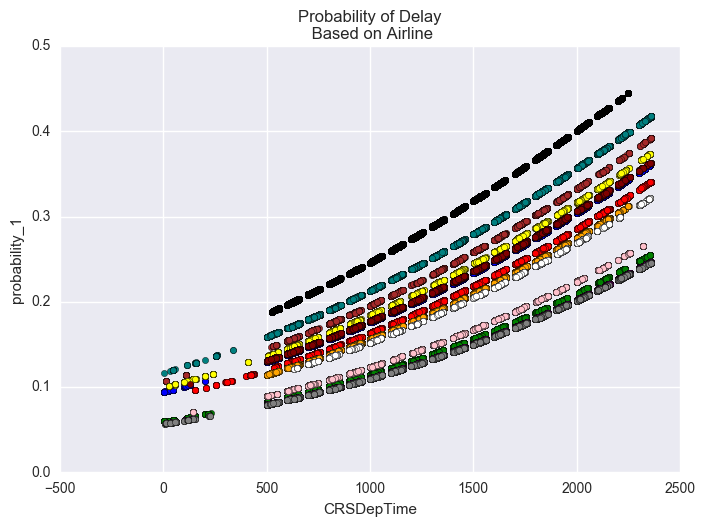

In [19]:
dfDelayData['probability_1'] = model.predict_proba(dfDelayData[features[1:]]).T[1]
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black', 'yellow', 'maroon','teal','gray','white']
for e, c in enumerate(colors):
    dfDelayData[dfDelayData[features[e]] == 1].plot(x='CRSDepTime', y='probability_1', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of Delay\n Based on Airline')

### Below, I'm predicting and graphing based upon day of week

In [28]:
dfDelayData.DayOfWeek.count() 

458311

In [29]:
features += ['CRSDepTime']
model.fit(dfDelayData[features[1:]], dfDelayData['DayOfWeek'])

dfDelayData['probability'] = model.predict_proba(dfDelayData[features[1:]]).T[1]

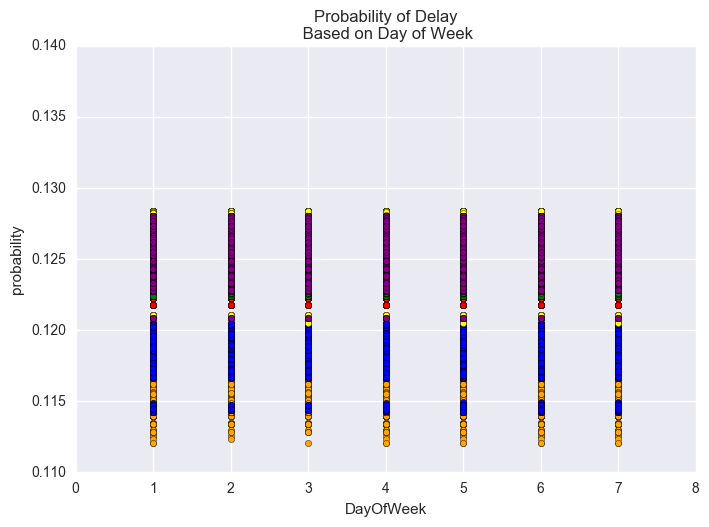

In [35]:
ax = plt.subplot(111)
colors = ['pink', 'red', 'orange', 'blue', 'green', 'yellow', 'purple']
for e, c in enumerate(colors):
    dfDelayData[dfDelayData[features[e]] == 1].plot(x='DayOfWeek', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week')

In [50]:
from sklearn import dummy, metrics

In [51]:
model0 = dummy.DummyClassifier()
model0.fit(dfDelayData[features[1:]], dfDelayData['DepDelay'])
dfDelayData['probability_0'] = model0.predict_proba(dfDelayData[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(dfDelayData[features[1:]], dfDelayData['DepDelay'])
dfDelayData['probability_1'] = model.predict_proba(dfDelayData[features[1:]]).T[1]

In [53]:
dfDelayData.shape

(458311, 35)

[(0, 1),
 (0, 1),

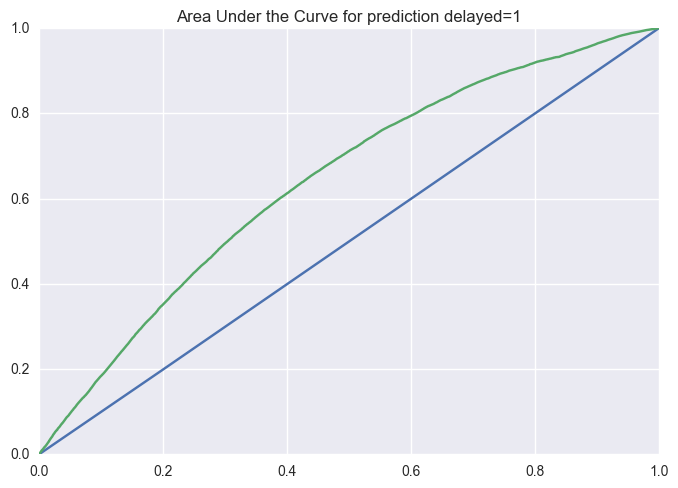

In [55]:
ax = plt.subplot(111)
vals = metrics.roc_curve(dfDelayData.DepDelay, dfDelayData.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(dfDelayData.DepDelay, dfDelayData.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

In [56]:
dfDelayData['prediction'] = model.predict(dfDelayData[features[1:]])

In [57]:
metrics.accuracy_score(dfDelayData.DepDelay, dfDelayData.prediction) 

0.80149287274361736

#### Based upon the graphs and the data above, there's an 80% confidence that the area under the curve is correct

In [60]:
metrics.classification_report(dfDelayData.DepDelay, dfDelayData.prediction)

print metrics.classification_report(dfDelayData.DepDelay, dfDelayData.prediction)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        0.0       0.80      1.00      0.89    367333
        1.0       0.00      0.00      0.00     90978

avg / total       0.64      0.80      0.71    458311



***

### Overview:

In the section below, I am looking at the impact of 

In [10]:
df08 = pd.read_csv('airlineData/DelayedFlights.csv') 

In [11]:
def binDelays(delayTime):
    if delayTime <= 8:
        return 1
    elif delayTime <= 15:
        return 2
    elif delayTime <= 25:
        return 3
    elif delayTime <= 45:
        return 4
    elif delayTime <= 60:
        return 5
    
    return 6
    

df08["DepDelayBin"] = df08.DepDelay.apply(binDelays)

In [12]:
pd.crosstab(df08.DepDelayBin,df08.Cancelled)

Cancelled,0,1
DepDelayBin,,
1,251436,27
2,408836,63
3,343268,70
4,361644,97
5,154659,60
6,416282,316


In [ ]:
df08.DepDelayBin.plot(kind = "bar") 
plt.show() 

In [32]:
df08["delay_target"] = df08["DepDelay"].apply( lambda x: 1 if x >= 20 else 0 )

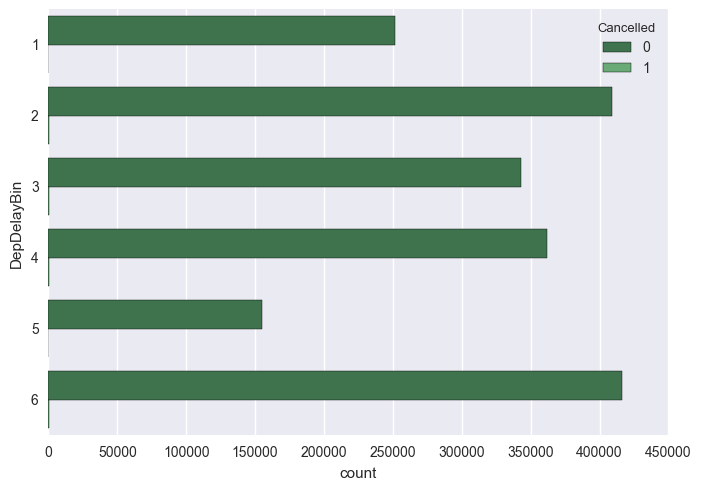

In [35]:
sns.countplot(y="DepDelayBin", hue="Cancelled", data=df08, palette="Greens_d");

In [37]:
df08["delay_target"] = df08["DepDelay"].apply( lambda x: 1 if x >= 20 else 0 ) 

In [39]:
pd.crosstab(df08.delay_target, df08.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
delay_target,,,,,,,,,,,,
0,75279,74703,83516,69454,69948,79454,73444,69295,44834,52450,47642,75130
1,108248,114831,117326,85810,83124,121460,109501,93353,50705,51075,57921,128255


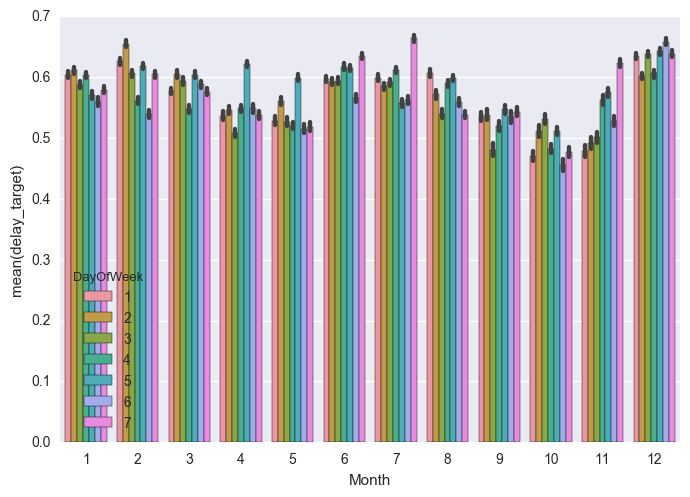

In [40]:
import seaborn as sns
sns.barplot(x="Month", y="delay_target", hue="DayOfWeek", data=df08);

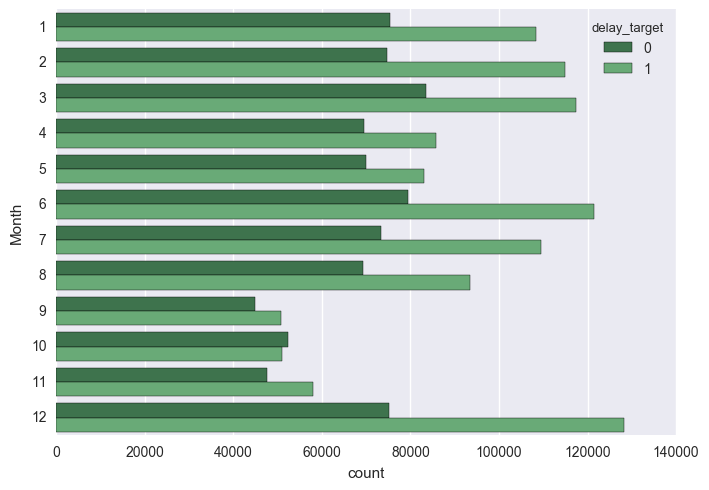

In [41]:
sns.countplot(y="Month", hue="delay_target", data=df08, palette="Greens_d");

In [42]:
pd.crosstab(df08.DepDelay, df08.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
DepDelay,,,,,,,,,,,,
6.0,7927,7843,8952,7878,7975,8646,8553,8059,5634,6546,5669,7923
7.0,7597,7379,8316,7248,7244,7980,7471,7243,4863,5942,5069,7282
8.0,6866,6849,7625,6518,6681,7470,6903,6495,4379,5193,4545,6700
9.0,6472,6332,7111,5883,6138,6873,6294,6008,3960,4684,4124,6341
10.0,6857,6700,7729,6297,6174,7252,6529,6266,4181,4559,4351,6581
11.0,5352,5276,6175,5026,5101,5732,5147,5137,3121,3695,3444,5554
12.0,5062,5186,5666,4832,4653,5379,4900,4726,2928,3546,3235,5121
13.0,4813,4878,5368,4380,4407,4968,4653,4375,2711,3210,3032,4888
14.0,4488,4457,4990,4126,4092,4742,4341,3965,2502,2988,2786,4697
